In [34]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [35]:
def get_df(df_path='monthly_car_sales.csv', date_col='Month'):
    df = pd.read_csv(df_path)
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.set_index(date_col)
    return df

In [36]:
df = get_df()

In [37]:
df.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


<Axes: xlabel='Month'>

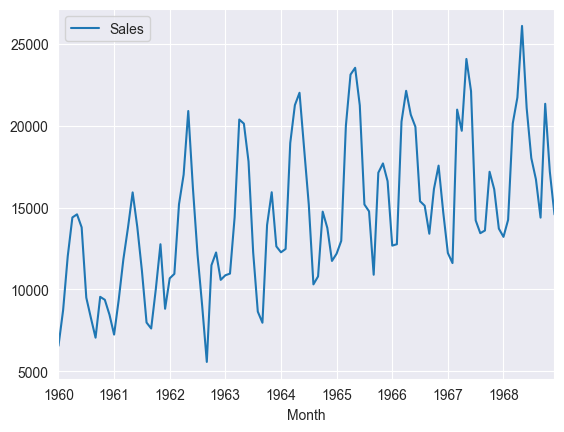

In [38]:
df.plot()

In [39]:
X = df.reset_index().index.values[:-30]
y = df.Sales.values[:-30]

In [41]:
linreg = LinearRegression(n_jobs=-1)
lgbm = LGBMRegressor(n_estimators=10)

linreg.fit(X.reshape(-1, 1), y)
lgbm.fit(X.reshape(-1, 1), y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 78, number of used features: 1
[LightGBM] [Info] Start training from score 13669.730769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMRegressor(n_estimators=10)

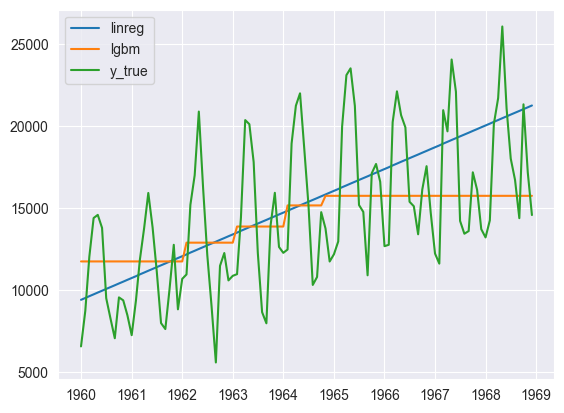

In [42]:
plt.plot(df.index, linreg.predict(df.reset_index().index.values.reshape(-1, 1)), label='linreg');
plt.plot(df.index, lgbm.predict(df.reset_index().index.values.reshape(-1, 1)), label='lgbm');
plt.plot(df.index, df.Sales, label='y_true');
plt.legend();

Лаги

In [43]:
df['lag_3'] = df.Sales.shift(3)
df['lag_4'] = df.Sales.shift(4)
df['lag_5'] = df.Sales.shift(5)
df[:10]

,Sales,lag_3,lag_4,lag_5
Month,,,,
1960-01-01,6550,NaN,NaN,NaN
1960-02-01,8728,NaN,NaN,NaN
1960-03-01,12026,NaN,NaN,NaN
1960-04-01,14395,6550.0,NaN,NaN
1960-05-01,14587,8728.0,6550.0,NaN
1960-06-01,13791,12026.0,8728.0,6550.0
1960-07-01,9498,14395.0,12026.0,8728.0
1960-08-01,8251,14587.0,14395.0,12026.0
1960-09-01,7049,13791.0,14587.0,14395.0


In [44]:
X = df.drop(columns=['Sales']).reset_index().drop(columns=['Month']).reset_index().values[5:]
y = df.Sales.values[5:]

linreg = LinearRegression(n_jobs=-1)
lgbm = LGBMRegressor(n_estimators=10)

linreg.fit(X, y)
lgbm.fit(X, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 103, number of used features: 4
[LightGBM] [Info] Start training from score 14757.145631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

LGBMRegressor(n_estimators=10)

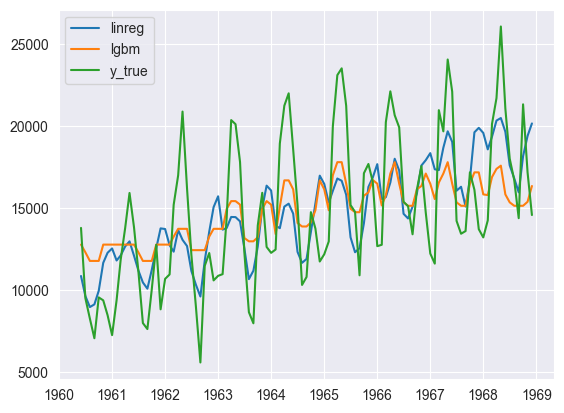

In [45]:
plt.plot(df.index[5:], linreg.predict(X), label='linreg');
plt.plot(df.index[5:], lgbm.predict(X), label='lgbm');
plt.plot(df.index[5:], df.Sales[5:], label='y_true');
plt.legend();

In [46]:
horizon = 12

def split_df(df, h=horizon):
    df_train, df_test = df[: len(df) - h], df[len(df) - h:]
    return df_train, df_test

In [47]:
df_train, df_test = split_df(df)

In [48]:
df_train.tail()

,Sales,lag_3,lag_4,lag_5
Month,,,,
1967-08-01,13434,24081.0,19692.0,20985.0
1967-09-01,13598,22114.0,24081.0,19692.0
1967-10-01,17187,14220.0,22114.0,24081.0
1967-11-01,16119,13434.0,14220.0,22114.0
1967-12-01,13713,13598.0,13434.0,14220.0


In [49]:
df_test

,Sales,lag_3,lag_4,lag_5
Month,,,,
1968-01-01,13210,17187.0,13598.0,13434.0
1968-02-01,14251,16119.0,17187.0,13598.0
1968-03-01,20139,13713.0,16119.0,17187.0
1968-04-01,21725,13210.0,13713.0,16119.0
1968-05-01,26099,14251.0,13210.0,13713.0
1968-06-01,21084,20139.0,14251.0,13210.0
1968-07-01,18024,21725.0,20139.0,14251.0
1968-08-01,16722,26099.0,21725.0,20139.0
1968-09-01,14385,21084.0,26099.0,21725.0


есть ли лик?

в общем случае надо так  𝑙𝑎𝑔𝑡−𝑘 , где  𝑘>=ℎ𝑜𝑟𝑖𝑧𝑜𝑛

можно починить, например, так:

In [50]:
df = get_df()
df['Sales'].iloc[-horizon:] = np.nan
df['lag_1'] = df.Sales.shift(1)
df['lag_4'] = df.Sales.shift(4)
df['lag_12'] = df.Sales.shift(12)
df_train, df_test = split_df(df)

C:\Users\kuzin\AppData\Local\Temp\ipykernel_6396\966131904.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Sales'].iloc[-horizon:] = np.nan


In [51]:
df_train.tail()

,Sales,lag_1,lag_4,lag_12
Month,,,,
1967-08-01,13434.0,14220.0,19692.0,15113.0
1967-09-01,13598.0,13434.0,24081.0,13401.0
1967-10-01,17187.0,13598.0,22114.0,16135.0
1967-11-01,16119.0,17187.0,14220.0,17562.0
1967-12-01,13713.0,16119.0,13434.0,14720.0


In [52]:
df_test

,Sales,lag_1,lag_4,lag_12
Month,,,,
1968-01-01,NaN,13713.0,13598.0,12225.0
1968-02-01,NaN,NaN,17187.0,11608.0
1968-03-01,NaN,NaN,16119.0,20985.0
1968-04-01,NaN,NaN,13713.0,19692.0
1968-05-01,NaN,NaN,NaN,24081.0
1968-06-01,NaN,NaN,NaN,22114.0
1968-07-01,NaN,NaN,NaN,14220.0
1968-08-01,NaN,NaN,NaN,13434.0
1968-09-01,NaN,NaN,NaN,13598.0


In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import lightgbm

In [54]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

Создание рядов

In [55]:
def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish

    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """

    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level

    return noise

## Generate the synthetic data


Создадим набор с трендом и годовой сезонностью.

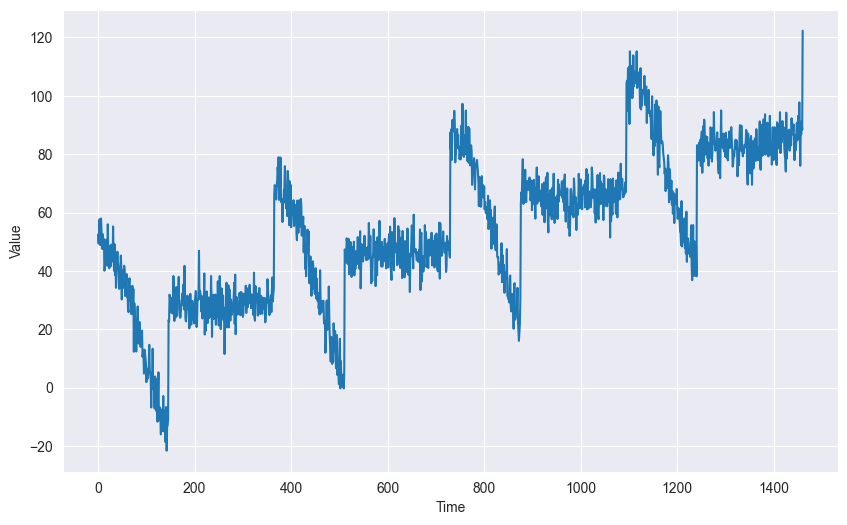

In [56]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

## Split the Dataset


In [57]:
# Define the split time
split_time = 1000

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

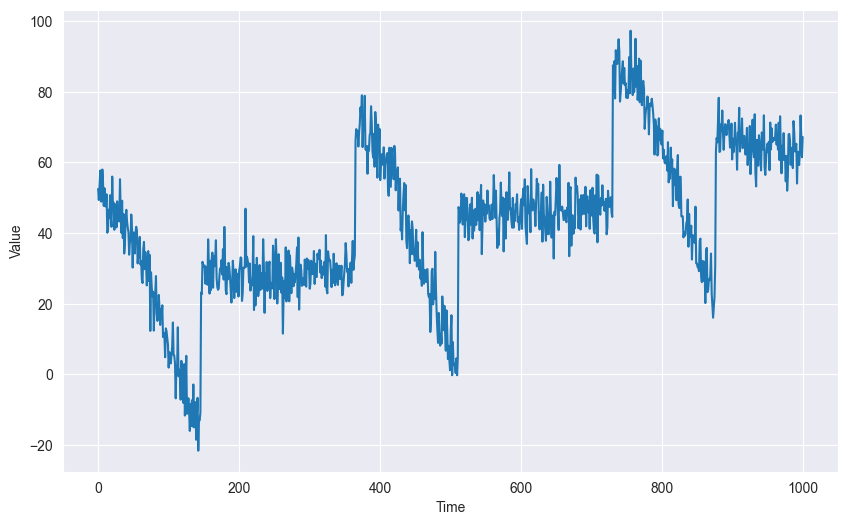

In [58]:
# Plot the train set
plot_series(time_train, x_train)

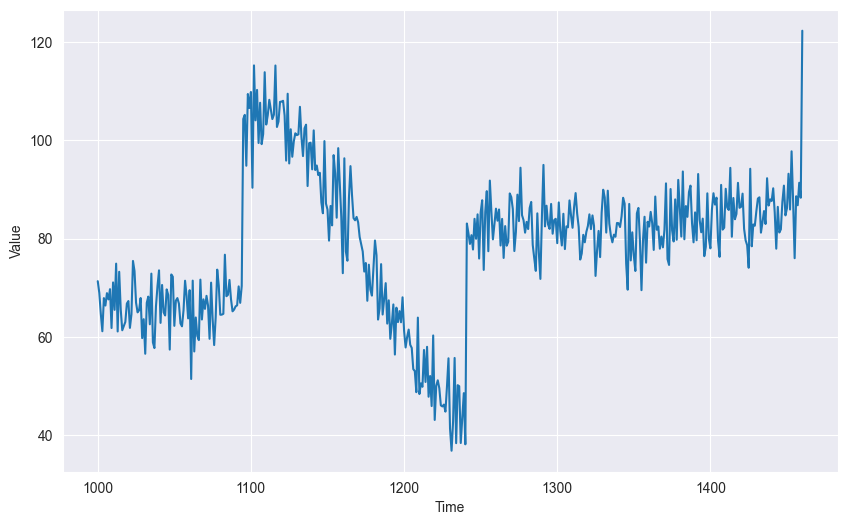

In [59]:
# Plot the validation set
plot_series(time_valid, x_valid)

# Naive Forecast

In [60]:
# Generate the naive forecast
naive_forecast = series[split_time - 1:-1]

# Define time step
time_step = 100

# Print values
print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')

ground truth at time step 100: 109.84197998046875
prediction at time step 101: 109.84197998046875


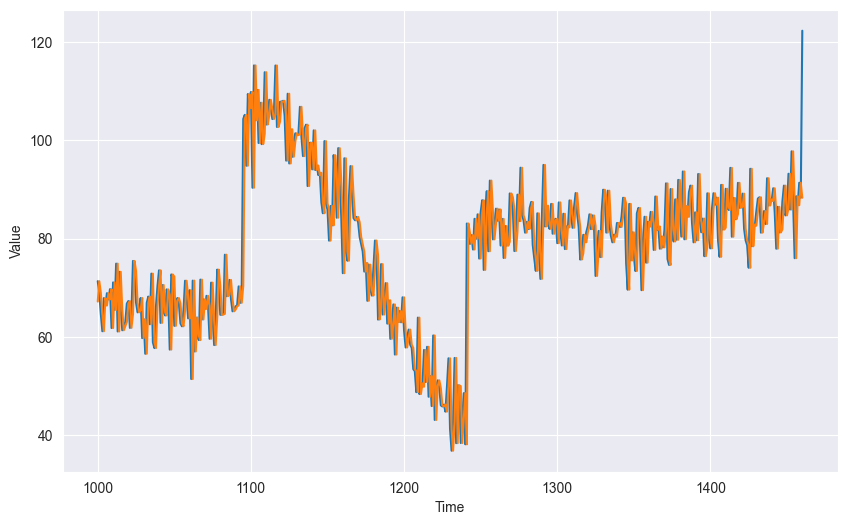

In [61]:
# Plot the results
plot_series(time_valid, (x_valid, naive_forecast))

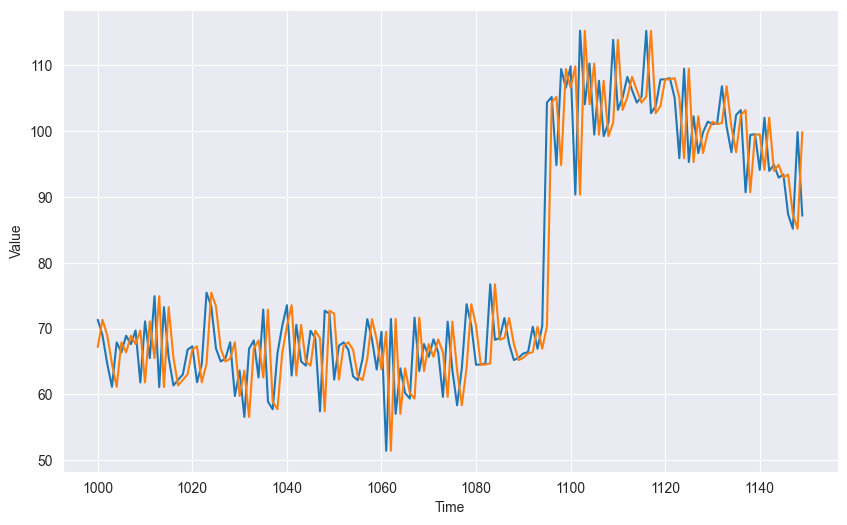

In [62]:
# Zooming in
plot_series(time_valid, (x_valid, naive_forecast), start=0, end=150)

### Computing Metrics


In [63]:
print(tf.keras.metrics.mse(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mae(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mape(x_valid, naive_forecast).numpy())

61.827534
5.937908
7.8456984


## Moving Average

In [64]:
def moving_average_forecast(series, window_size):
    """Generates a moving average forecast

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to compute the average for

    Returns:
      forecast (array of float) - the moving average forecast
    """

    # Initialize a list
    forecast = []

    # Compute the moving average based on the window size
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())

    # Convert to a numpy array
    forecast = np.array(forecast)

    return forecast

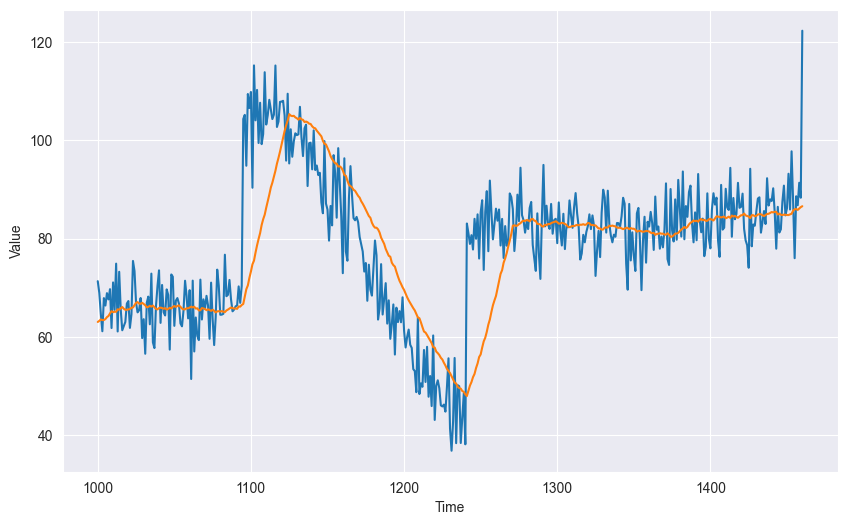

In [71]:
# Generate the moving average forecast
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))

In [66]:
# Compute the metrics
print(tf.keras.metrics.mse(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mae(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mape(x_valid, moving_avg).numpy())

106.674576
7.142419
9.288331


## Differencing

Сделаем дифференцирование t - 365

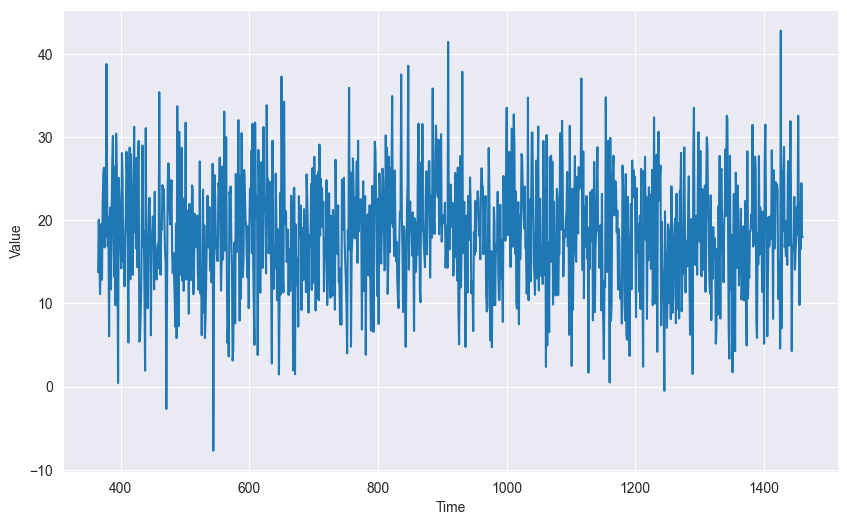

In [67]:
# Subtract the values at t-365 from original series
diff_series = (series[365:] - series[:-365])

# Truncate the first 365 time steps
diff_time = time[365:]

# Plot the results
plot_series(diff_time, diff_series)

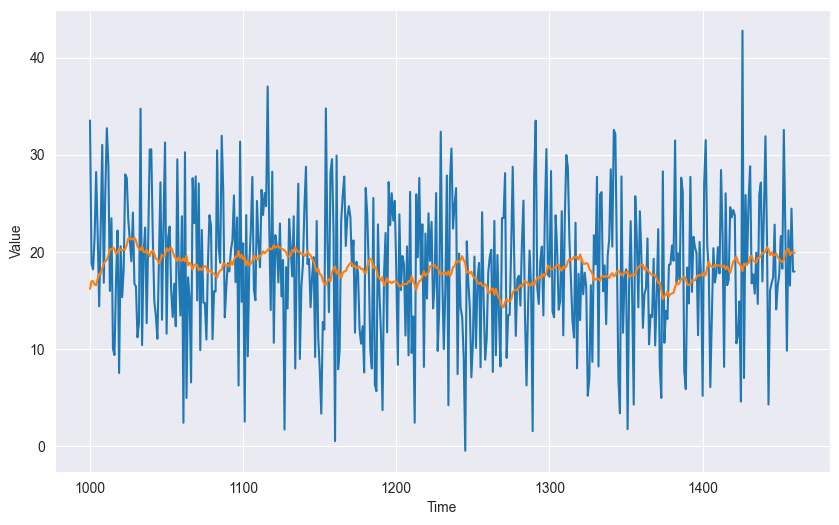

In [68]:
# Generate moving average from the time differenced dataset
diff_moving_avg = moving_average_forecast(diff_series, 30)

# Slice the prediction points that corresponds to the validation set time steps
diff_moving_avg = diff_moving_avg[split_time - 365 - 30:]

# Slice the ground truth points that corresponds to the validation set time steps
diff_series = diff_series[split_time - 365:]

# Plot the results
plot_series(time_valid, (diff_series, diff_moving_avg))


Теперь надо все вернуть

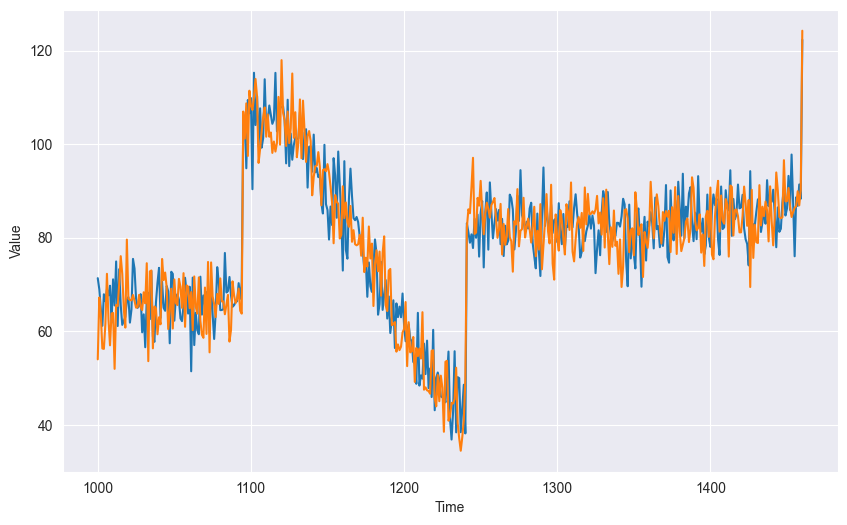

In [72]:
# Add the trend and seasonality from the original series
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [73]:
print(tf.keras.metrics.mse(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mae(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mape(x_valid, diff_moving_avg_plus_past).numpy())

53.764587
5.9032416
7.935164


Выглядит лучше наивного прогноза.

## Smoothing

Надо следать за границами окон

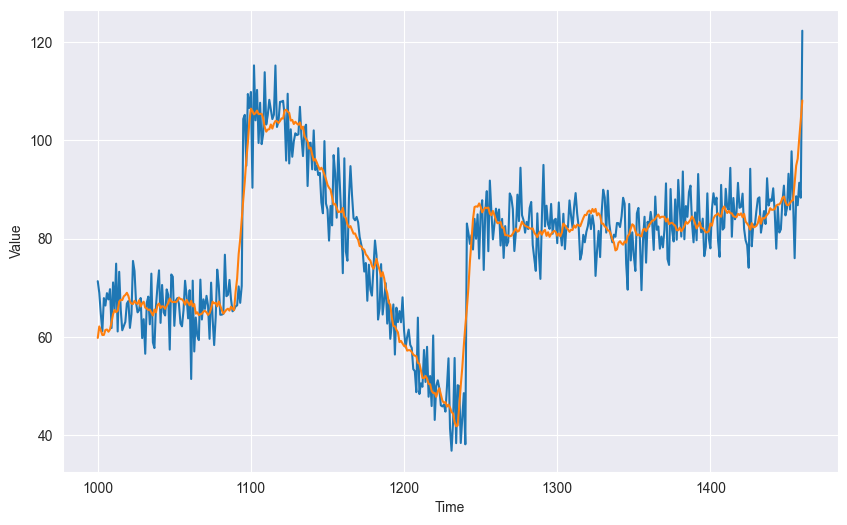

In [75]:
# Smooth the original series before adding the time differenced moving average
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-359], 11) + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))

In [76]:
 # Compute the metrics
print(tf.keras.metrics.mse(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mae(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mape(x_valid, diff_moving_avg_plus_smooth_past).numpy())

34.315723
4.6053295
6.1712885


# One Layer NN

In [77]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [78]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [80]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [81]:
# Print properties of a single batch
for windows in dataset.take(1):
    print(f'data type: {type(windows)}')
    print(f'number of elements in the tuple: {len(windows)}')
    print(f'shape of first element: {windows[0].shape}')
    print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 20)
shape of second element: (32,)


## Model

### Build

In [ ]:
# Build the single layer neural network
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

# Print the initial layer weights
print("Layer weights: \n {} \n".format(l0.get_weights()))

# Print the model summary
model.summary()

### train

In [ ]:
# Set the training parameters
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [ ]:
# Train the model
model.fit(dataset,epochs=100)

In [ ]:
# Print the layer weights
print("Layer weights {}".format(l0.get_weights()))

### Predictions

In [ ]:
# Shape of the first 20 data points slice
print(f'shape of series[0:20]: {series[0:20].shape}')

# Shape after adding a batch dimension
print(f'shape of series[0:20][np.newaxis]: {series[0:20][np.newaxis].shape}')

# Shape after adding a batch dimension (alternate way)
print(f'shape of series[0:20][np.newaxis]: {np.expand_dims(series[0:20], axis=0).shape}')

# Sample model prediction
print(f'model prediction: {model.predict(series[0:20][np.newaxis])}')

In [ ]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

# Slice the points that are aligned with the validation set
forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

In [ ]:
# Reduce the original series
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mse(x_valid, results).numpy())
print(tf.keras.metrics.mae(x_valid, results).numpy())
print(tf.keras.metrics.mape(x_valid, results).numpy())

# Deep NN

![title](/content/deepnn.png)

## Build

In [ ]:
# Build the model
model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_baseline.summary()

## Train

In [ ]:
# Set the training parameters
model_baseline.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [ ]:
# Train the model
model_baseline.fit(dataset,epochs=150)

## Predictions

In [ ]:
# Reduce the original series
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_baseline, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
    forecast.append(model_baseline.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_percentage_error(x_valid, results).numpy())

## Callback

In [ ]:
# Build the Model
model_tune = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 20))

In [ ]:
# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

In [ ]:
# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

In [ ]:
# Define the learning rate array
lrs = 1e-6 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 300])

In [ ]:
# Build the model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

In [ ]:
# Set the optimizer with the tuned learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=5e-6, momentum=0.9)

In [ ]:
# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100)

In [ ]:
# Plot the loss
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

In [ ]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

In [ ]:
# Reduce the original series
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_tune, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_percentage_error(x_valid, results).numpy())

# RNN

![title](rnn1.png)

In [ ]:
def step_series(n, mean, scale, n_steps):
    s = np.zeros(n)
    step_idx = np.random.randint(0, n, n_steps)
    value = mean
    for t in range(n):
        s[t] = value
        if t in step_idx:
            value = mean + scale * np.random.randn()
    return s

def linear_link(x):
    return x

def mem_link(x, length = 50):
    mfilter = np.exp(np.linspace(-10, 0, length))
    return np.convolve(x, mfilter/np.sum(mfilter), mode='same')

def create_signal(links = [linear_link, mem_link]):
    days_year = 365
    quaters_year = 4
    days_week = 7

    # three years of data, daily resolution
    idx = pd.date_range(start='2018-01-01', end='2021-01-01', freq='D')

    df = pd.DataFrame(index=idx, dtype=float)
    df = df.fillna(0.0)

    n = len(df.index)
    trend = np.zeros(n)
    seasonality = np.zeros(n)
    for t in range(n):
        trend[t] = 2.0 * t/n
        seasonality[t] = 4.0 * np.sin(np.pi * t/days_year*quaters_year)

    covariates = [step_series(n, 0, 1.0, 80), step_series(n, 0, 1.0, 80)]
    covariate_links = [ links[i](covariates[i]) for i in range(2) ]

    noise = 0.5 * np.random.randn(n)

    signal = trend + seasonality + np.sum(covariate_links, axis=0) + noise

    df['signal'], df['trend'], df['seasonality'], df['noise'] = signal, trend, seasonality, noise
    for i in range(2):
        df[f'covariate_0{i+1}'] = covariates[i]
        df[f'covariate_0{i+1}_link'] = covariate_links[i]

    return df

df = create_signal()
fig, ax = plt.subplots(len(df.columns[:]), figsize=(20, 15))
for i, c in enumerate(df.columns[:]):
    ax[i].plot(df.index, df[c])
    ax[i].set_title(c)

plt.tight_layout()
plt.show()

In [ ]:
#
# train-test split and adjustments
#
def train_test_split(df, train_ratio, forecast_days_ahead, n_time_steps, time_step_interval):

    # lenght of the input time window for each sample (the offset of the oldest sample in the input)
    input_window_size = n_time_steps*time_step_interval

    split_t = int(len(df)*train_ratio)
    x_train, y_train = [], []
    x_test, y_test = [], []
    y_col_idx = list(df.columns).index('signal')
    for i in range(input_window_size, len(df)):
        t_start = df.index[i - input_window_size]
        t_end = df.index[i]
        # we zero out last forecast_days_ahead signal observations, but covariates are assumed to be known
        x_t = df[t_start:t_end:time_step_interval].values.copy()
        if time_step_interval <= forecast_days_ahead:
            x_t[-int((forecast_days_ahead) / time_step_interval):, y_col_idx] = 0

        y_t = df.iloc[i]['signal']

        if i < split_t:
            x_train.append(x_t)
            y_train.append(y_t)
        else:
            x_test.append(x_t)
            y_test.append(y_t)

    return np.stack(x_train), np.hstack(y_train), np.stack(x_test), np.hstack(y_test)


#
# engineer features and create input tensors
#
def prepare_features(df):
    df_prep = df[['signal', 'covariate_01', 'covariate_02']]
    df_prep['year'] = df_prep.index.year
    df_prep['month'] = df_prep.index.month
    df_prep['day_of_year'] = df_prep.index.dayofyear

    def normalize(df):
        x = df.values
        min_max_scaler = MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        return pd.DataFrame(x_scaled, index=df.index, columns=df.columns)

    return normalize(df_prep)

In [ ]:
#
# parameters
#
n_time_steps = 40         # lenght of LSTM input in samples
time_step_interval = 2    # sampling interval, days
hidden_units = 8          # LSTM state dimensionality
forecast_days_ahead = 7
train_ratio = 0.8

#
# generate data and fit the model
#
# df = create_signal()
df_prep = prepare_features(df)
x_train, y_train, x_test, y_test = train_test_split(df_prep,
                                                    train_ratio,
                                                    forecast_days_ahead,
                                                    n_time_steps,
                                                    time_step_interval)

In [ ]:
df_prep.head()

## Build

In [ ]:
n_samples = x_train.shape[0]
n_features = x_train.shape[2]

input_shape=(n_time_steps, n_features)

In [ ]:
x_train.shape

In [ ]:
# Build the Model
model_tune = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(x_train.shape[1], n_features)),
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True),
    tf.keras.layers.SimpleRNN(10),
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_tune.summary()

## Train

In [ ]:
# Set the training parameters
model_tune.compile(loss=tf.keras.losses.Huber(),
              optimizer='RMSprop',
              metrics=["mean_absolute_percentage_error"])

# Train the model
history = model_tune.fit(x_train, y_train, epochs=20, batch_size=4, validation_data=(x_test, y_test),
                    use_multiprocessing=True, verbose=1)

In [ ]:
score = model_tune.evaluate(x_test, y_test, verbose=0)
print('Test MAPE:', score[1])

## Predictions

In [ ]:
input_window_size = n_time_steps*time_step_interval
x = np.vstack([x_train, x_test])
y_hat = model_tune.predict(x)
forecast = np.append(np.zeros(input_window_size), y_hat)

#
# plot the forecast
#
fig, ax = plt.subplots(1, figsize=(20, 5))
ax.plot(df_prep.index, forecast, label=f'Forecast ({forecast_days_ahead} days ahead)')
ax.plot(df_prep.index, df_prep['signal'], label='Signal')
ax.axvline(x=df.index[int(len(df) * train_ratio)], linestyle='--')
ax.legend()
plt.show()

# LSTM

![title](lstm2.png)

## Build

In [ ]:
# Build the Model
model_tune = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(x_train.shape[1], n_features)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)),
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_tune.summary()

## Train

In [ ]:
# Set the training parameters
model_tune.compile(loss=tf.keras.losses.Huber(),
              optimizer='RMSprop',
              metrics=["mean_absolute_percentage_error"])

# Train the model
history = model_tune.fit(x_train, y_train, epochs=20, batch_size=4, validation_data=(x_test, y_test),
                    use_multiprocessing=True, verbose=1)

In [ ]:
score = model_tune.evaluate(x_test, y_test, verbose=0)
print('Test MAPE:', score[1])

## Predictions

In [ ]:
input_window_size = n_time_steps*time_step_interval
x = np.vstack([x_train, x_test])
y_hat = model_tune.predict(x)
forecast = np.append(np.zeros(input_window_size), y_hat)

#
# plot the forecast
#
fig, ax = plt.subplots(1, figsize=(20, 5))
ax.plot(df_prep.index, forecast, label=f'Forecast ({forecast_days_ahead} days ahead)')
ax.plot(df_prep.index, df_prep['signal'], label='Signal')
ax.axvline(x=df.index[int(len(df) * train_ratio)], linestyle='--')
ax.legend()
plt.show()

# LSTM II

## Build

In [ ]:
input_model = tf.keras.layers.Input(shape=(x_train.shape[1], n_features))
lstm_state_seq, state_h, state_c = tf.keras.layers.LSTM(10, return_sequences=True, return_state=True)(input_model)
output_dense = tf.keras.layers.Dense(1)(state_c)
model_lstm = tf.keras.models.Model(inputs=input_model, outputs=output_dense)

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
model_lstm.compile(loss=tf.keras.losses.Huber(),
              optimizer='RMSprop',
              metrics=["mean_absolute_percentage_error"])
model_lstm.summary()
model_lstm.fit(x_train, y_train, epochs=20, batch_size=4,
               validation_data=(x_test, y_test), use_multiprocessing=True, verbose=1)
score = model_lstm.evaluate(x_test, y_test, verbose=0)
print('Test MAPE:', score[1])

## Predictions

In [ ]:
## input_window_size = n_time_steps*time_step_interval
x = np.vstack([x_train, x_test])
y_hat = model_tune.predict(x)
forecast = np.append(np.zeros(input_window_size), y_hat)

#
# plot the forecast
#
fig, ax = plt.subplots(1, figsize=(20, 5))
ax.plot(df_prep.index, forecast, label=f'Forecast ({forecast_days_ahead} days ahead)')
ax.plot(df_prep.index, df_prep['signal'], label='Signal')
ax.axvline(x=df.index[int(len(df) * train_ratio)], linestyle='--')
ax.legend()
plt.show()

## State

In [ ]:
#
# plot the evolution of the LSTM state
#
lstm_state_tap = tf.keras.models.Model(model_lstm.input, lstm_state_seq)
lstm_state_trace = lstm_state_tap.predict(x)

state_series = lstm_state_trace[:, -1, :].T
fig, ax = plt.subplots(len(state_series), figsize=(20, 15))
for i, state in enumerate(state_series):
    ax[i].plot(df_prep.index[:len(state)], state, label=f'State dimension {i}')
    for j in [1, 2]:
        ax[i].plot(df_prep.index[:len(state)], df_prep[f'covariate_0{j}'][:len(state)], color='#bbbbbb', label=f'Covariate 0{j}')

    ax[i].legend(loc='upper right')
plt.show()

# GBDT

## update methods

In [82]:
#
# engineer features for the model
#
def features_regression(df):
    observed_features = ['covariate_01', 'covariate_02']
    dff = df[['signal'] + observed_features]

    dff['year'] = dff.index.year
    dff['month'] = dff.index.month
    dff['day_of_year'] = dff.index.dayofyear

    feature_lags = [7, 14, 21, 28, 35, 42, 49, 120, 182, 365]
    for lag in feature_lags:
        dff.loc[:, f'signal_lag_{lag}'] = dff['signal'].shift(periods=lag, fill_value=0).values

    return dff


#
# train-test split
#
def split_train_test(df, train_ratio):
    y_train, y_test = [], []
    x_train, x_test = [], []
    split_t = int(len(df)*train_ratio)

    y = df['signal']
    y_train = y[:split_t]
    y_test = y[split_t:]

    xdf = df.drop('signal', inplace=False, axis=1)
    x_train = xdf[:split_t]
    x_test = xdf[split_t:]

    return x_train, y_train, x_test, y_test

#
# fit LightGBM model
#
def fit_lightgbm(x_train, y_train, x_test, y_test, n_estimators=100, verbose_eval=50):

    model = lightgbm.LGBMRegressor(
        boosting_type = 'gbdt',
        #num_leaves = 8 - 1,
        n_estimators=n_estimators)

    model.fit(x_train,
              y_train,
              eval_set=[(x_train, y_train), (x_test, y_test)],
              eval_metric='mape',
            #   verbose=verbose_eval
              )

    return model

In [83]:
#
# generate data sample and fit the model
#
# df = features_regression(create_signal(links = [linear_link, mem_link]))
df_gbdt = features_regression(df)
train_ratio = 0.8
x_train, y_train, x_test, y_test = split_train_test(df_gbdt, train_ratio)
model = fit_lightgbm(x_train, y_train, x_test, y_test, n_estimators=500)    # can use fit_xgboost as an alternative

#
# plot the fitting metrics
#
lightgbm.plot_metric(model, metric='mape', figsize=(10, 3))

#
# plot the forecast
#
forecast = model.predict(pd.concat([x_train, x_test]))

fig, ax = plt.subplots(1, figsize=(20, 5))
ax.plot(df_gbdt.index, forecast, label='Forecast (7 days ahead)')
ax.plot(df_gbdt.index, df_gbdt['signal'], label='Actuals')
ax.axvline(x=df.index[int(len(df_gbdt) * train_ratio)], linestyle='--')
ax.legend()
plt.show()

KeyError: "None of [Index(['signal', 'covariate_01', 'covariate_02'], dtype='object')] are in the [columns]"

## Estimate Confidence Intervals for the Forecast

In [ ]:
#
# fit the quantile regression model with LightGBM
#
def fit_lightgbm_quantile(x_train, y_train, x_test, y_test, alpha, n_estimators=100, verbose_eval=50):

    model = lightgbm.LGBMRegressor(
        boosting_type = 'gbdt',
        objective = 'quantile',
        alpha = alpha,
        num_leaves = 8 - 1,
        n_estimators=n_estimators)

    model.fit(x_train,
              y_train,
              eval_set=[(x_train, y_train), (x_test, y_test)],
              eval_metric='mape',
            #   verbose=verbose_eval
              )

    return model

#
# generate data sample and fit models
#
df = features_regression(create_signal(links = [linear_link, mem_link]))
train_ratio = 0.8
x_train, y_train, x_test, y_test = split_train_test(df, train_ratio)
alphas = [0.90, 0.80, 0.70, 0.60]
model_mean = fit_lightgbm(x_train, y_train, x_test, y_test)
models_upper = [fit_lightgbm_quantile(x_train, y_train, x_test, y_test, 1 - alpha, verbose_eval=0) for alpha in alphas]
models_lower = [fit_lightgbm_quantile(x_train, y_train, x_test, y_test, alpha, verbose_eval=0) for alpha in alphas]

#
# plot the forecasts
#
x = pd.concat([x_train, x_test])
forecasts_upper = [model.predict(x) for model in models_upper]
forecasts_lower = [model.predict(x) for model in models_lower]
forecast_mean = model_mean.predict(x)

fig, ax = plt.subplots(1, figsize=(20, 5))
pal = ["#eeef20", "#d4d700", "#80b918", "#2b9348"]
for i, alpha in enumerate(alphas):
    ax.fill_between(df.index, forecasts_lower[i], forecasts_upper[i], alpha=0.5, fc=pal[i], ec='None', label=f'Forecast CI ({alpha})')
ax.plot(df.index, df['signal'], color='r', alpha=0.2, label='Actuals')
ax.plot(df.index, forecast_mean, color='k', alpha=0.5, label='Forecast mean')
ax.axvline(x=df.index[int(len(df) * train_ratio)], linestyle='--')
ax.legend()
plt.show()

# Как улучшить GBDT?

In [ ]:
df['signal_orig'] = df.signal.copy()

In [ ]:
plt.plot(df.signal_orig.diff())

In [ ]:
df.signal.hist(bins='auto')

In [ ]:
def preprocessing_for_gbdt(df):
    df['signal_orig'] = df.signal.copy()
    df['signal'] = df.signal_orig.diff()

def features_regression_best(df):
    observed_features = ['covariate_01', 'covariate_02']
    dff = df[['signal'] + observed_features]

    dff['year'] = dff.index.year
    dff['month'] = dff.index.month
    dff['day_of_year'] = dff.index.dayofyear

    feature_lags = [7, 14, 21, 28, 35, 42, 49, 120, 182, 365]
    for lag in feature_lags:
        dff.loc[:, f'signal_lag_{lag}'] = dff['signal'].shift(periods=lag, fill_value=0).values


    return dff

In [ ]:
df.head()

In [ ]:
preprocessing_for_gbdt(df)
df_gbdt = features_regression_best(df)
train_ratio = 0.8
x_train, y_train, x_test, y_test = split_train_test(df_gbdt, train_ratio)
model = fit_lightgbm(x_train, y_train, x_test, y_test, n_estimators=500)    # can use fit_xgboost as an alternative

#
# plot the fitting metrics
#
lightgbm.plot_metric(model, metric='mape', figsize=(10, 3))

#
# plot the forecast
#
forecast = model.predict(pd.concat([x_train, x_test]))

fig, ax = plt.subplots(1, figsize=(20, 5))
ax.plot(df_gbdt.index, forecast, label='Forecast (7 days ahead)')
ax.plot(df_gbdt.index, df_gbdt['signal'], label='Actuals')
ax.axvline(x=df.index[int(len(df_gbdt) * train_ratio)], linestyle='--')
ax.legend()
plt.show()

In [ ]:
forecast_upd = forecast + df.signal_orig.shift()

In [ ]:
forecast_upd

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 5))
ax.plot(df_gbdt.index, forecast_upd, label='Forecast (7 days ahead)')
ax.plot(df_gbdt.index, df['signal_orig'], label='Actuals')
ax.axvline(x=df.index[int(len(df_gbdt) * train_ratio)], linestyle='--')
ax.legend()
plt.show()

In [ ]:
df.head()

In [ ]:
y_hat = model.predict(x_test) + df.signal_orig.iloc[-y_test.shape[0]:].shift()

In [ ]:
plt.plot(y_hat)
plt.plot(df.signal_orig.iloc[-y_test.shape[0]:])

In [ ]:
print(tf.keras.metrics.mean_absolute_percentage_error(df.signal_orig.iloc[-y_test.shape[0]+1:], y_hat[1:]).numpy())

# new data

In [84]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [85]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
metro_interstate_traffic_volume = fetch_ucirepo(id=492)

# data (as pandas dataframes)
X = metro_interstate_traffic_volume.data.features
X.date_time = pd.to_datetime(X.date_time)
y = metro_interstate_traffic_volume.data.targets

df = metro_interstate_traffic_volume.data.original
df.date_time = pd.to_datetime(df.date_time)

# metadata
print(metro_interstate_traffic_volume.metadata)

# variable information
print(metro_interstate_traffic_volume.variables)


{'uci_id': 492, 'name': 'Metro Interstate Traffic Volume', 'repository_url': 'https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume', 'data_url': 'https://archive.ics.uci.edu/static/public/492/data.csv', 'abstract': 'Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 48204, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['traffic_volume'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5X60B', 'creators': ['John Hogue'], 'intro_paper': None, 'additional_info': {'summary': 'Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weath

C:\Users\kuzin\AppData\Local\Temp\ipykernel_6396\133912061.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.date_time = pd.to_datetime(X.date_time)


<Axes: >

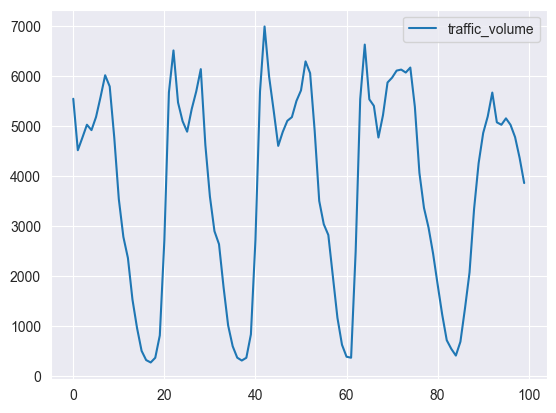

In [86]:
y[:100].plot()

In [88]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [89]:
X_daily = df.assign(cur_date=pd.to_datetime(X.date_time.dt.date))\
    .groupby('cur_date')\
    .agg({'traffic_volume': 'sum'})\
    .reset_index()

In [90]:
X_daily.head()

,cur_date,traffic_volume
0,2012-10-02,63289
1,2012-10-03,66345
2,2012-10-04,89939
3,2012-10-05,93336
4,2012-10-06,74910


<Axes: >

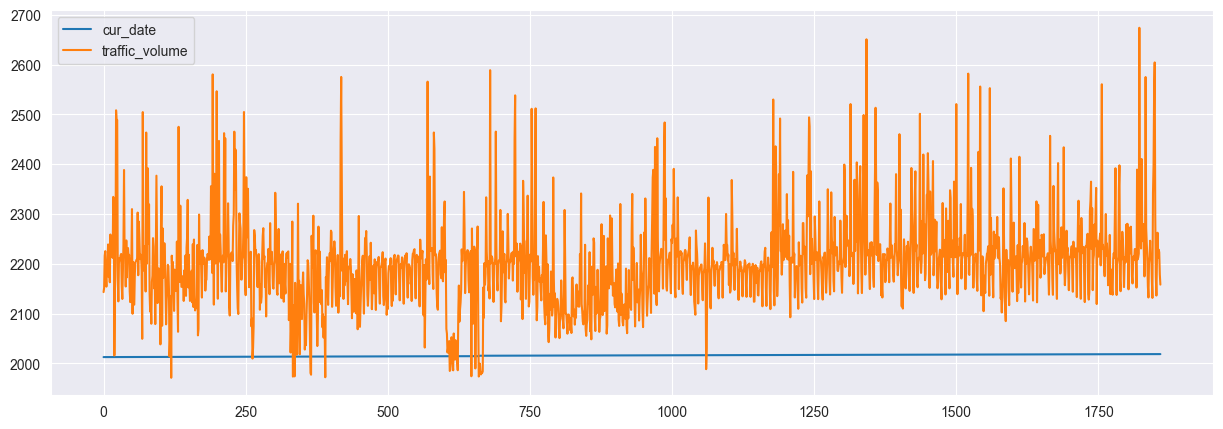

In [91]:
X_daily.plot(figsize=(15, 5))

In [92]:
X_daily.traffic_volume.describe(percentiles=[0.01, 0.5, 0.99])

count      1860.000000
mean      84481.873118
std       32237.972236
min         434.000000
1%         6547.590000
50%       84424.500000
99%      198239.220000
max      257191.000000
Name: traffic_volume, dtype: float64

In [93]:
X_daily['traffic_volume_clipped'] = X_daily.traffic_volume.clip(lower=X_daily.traffic_volume.quantile(0.01))

<Axes: >

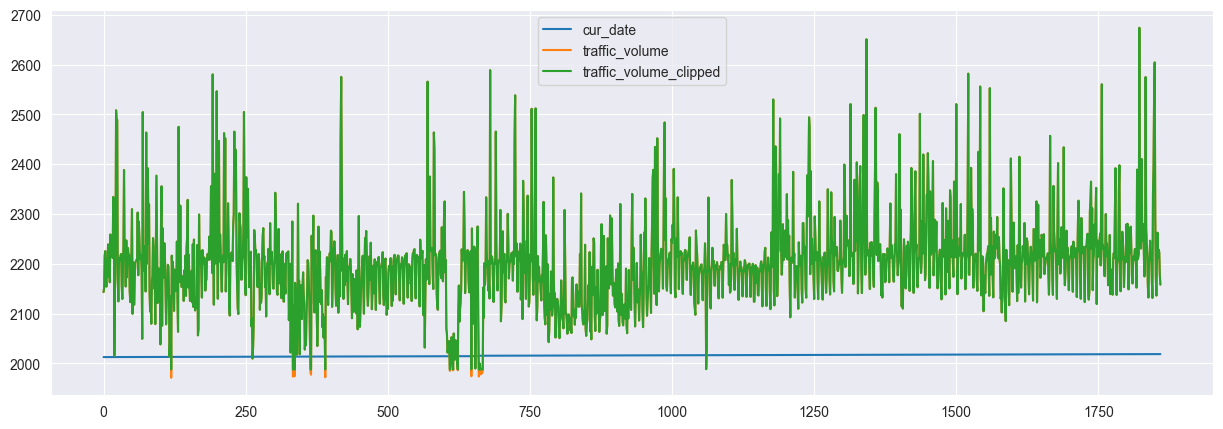

In [94]:
X_daily.plot(figsize=(15, 5))

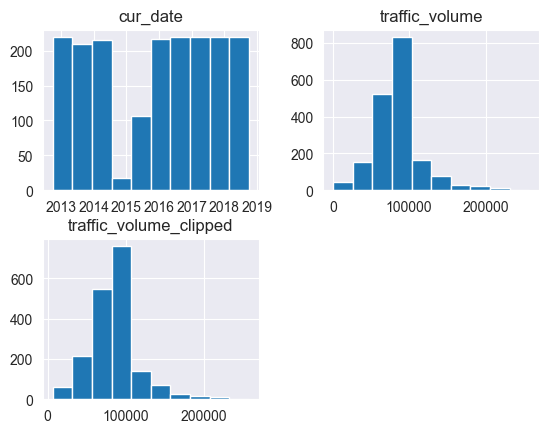

In [95]:
X_daily.hist();

<Axes: >

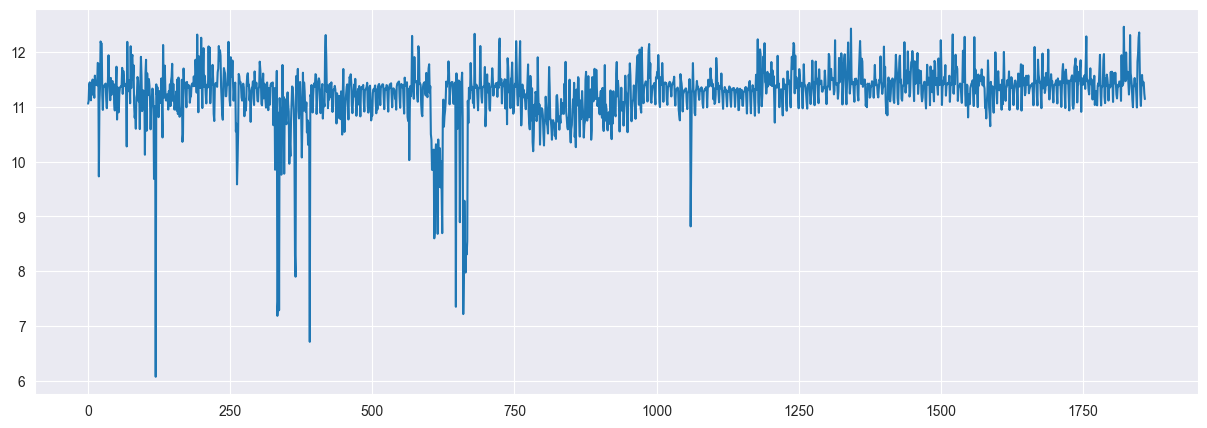

In [96]:
X_daily.traffic_volume.apply(np.log1p).plot(figsize=(15, 5))

<Axes: >

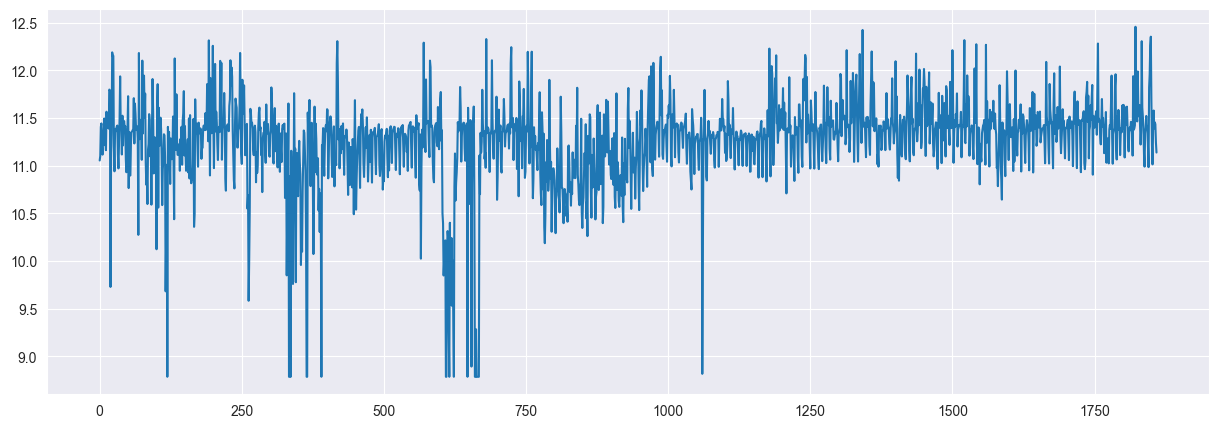

In [97]:
X_daily.traffic_volume_clipped.apply(np.log1p).plot(figsize=(15, 5))

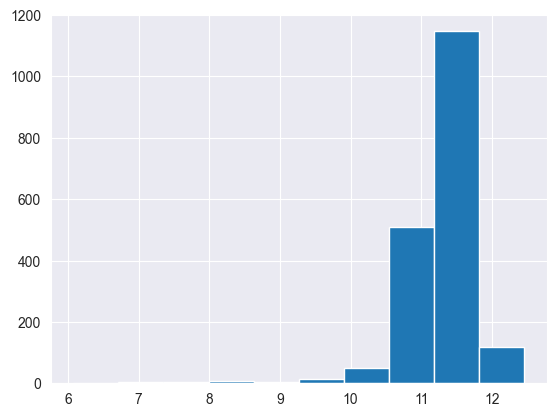

In [98]:
X_daily.traffic_volume.apply(np.log1p).hist();

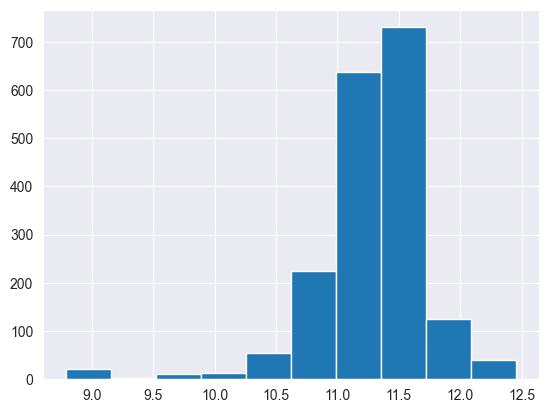

In [99]:
X_daily.traffic_volume_clipped.apply(np.log1p).hist();

In [100]:
def features_regression(df, feats=['traffic_volume_clipped']):
    # observed_features = ['covariate_01', 'covariate_02']
    # dff = df[['signal'] + observed_features]
    dff = df.copy()

    dff['year'] = dff.cur_date.dt.year
    dff['month'] = dff.cur_date.dt.month
    dff['day_of_year'] = dff.cur_date.dt.dayofyear

    feature_lags = [7, 14, 21, 28, 35, 42, 49, 120, 182, 365]
    for lag in feature_lags:
        for feat in feats:
            dff.loc[:, f'{feat}_{lag}'] = dff[feat].shift(periods=lag, fill_value=0).values

    return dff


#
# train-test split
#
def split_train_test(df, train_ratio, target_col='traffic_volume_clipped', dt_col='cur_date'):
    y_train, y_test = [], []
    x_train, x_test = [], []
    split_t = int(len(df)*train_ratio)

    df = df.sort_values(dt_col)

    y = df[target_col]
    y_train = y[:split_t]
    y_test = y[split_t:]

    xdf = df.drop([target_col, dt_col], inplace=False, axis=1)
    x_train = xdf[:split_t]
    x_test = xdf[split_t:]

    return x_train, y_train, x_test, y_test

#
# fit LightGBM model
#
def fit_lightgbm(x_train, y_train, x_test, y_test, n_estimators=100, verbose_eval=50):

    model = lightgbm.LGBMRegressor(
        boosting_type = 'gbdt',
        #num_leaves = 8 - 1,
        n_estimators=n_estimators)

    model.fit(x_train,
              y_train,
              eval_set=[(x_train, y_train), (x_test, y_test)],
              eval_metric='mape',
            #   verbose=verbose_eval
              )

    return model

In [101]:
X_daily.columns

Index(['cur_date', 'traffic_volume', 'traffic_volume_clipped'], dtype='object')

In [102]:
df_feats = features_regression(X_daily.drop(columns=['traffic_volume']))

In [103]:
df_feats.head()

,cur_date,traffic_volume_clipped,year,month,day_of_year,traffic_volume_clipped_7,traffic_volume_clipped_14,traffic_volume_clipped_21,traffic_volume_clipped_28,traffic_volume_clipped_35,traffic_volume_clipped_42,traffic_volume_clipped_49,traffic_volume_clipped_120,traffic_volume_clipped_182,traffic_volume_clipped_365
0,2012-10-02,63289.0,2012,10,276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-10-03,66345.0,2012,10,277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-10-04,89939.0,2012,10,278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-10-05,93336.0,2012,10,279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-10-06,74910.0,2012,10,280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2818
[LightGBM] [Info] Number of data points in the train set: 1488, number of used features: 13
[LightGBM] [Info] Start training from score 81841.085489


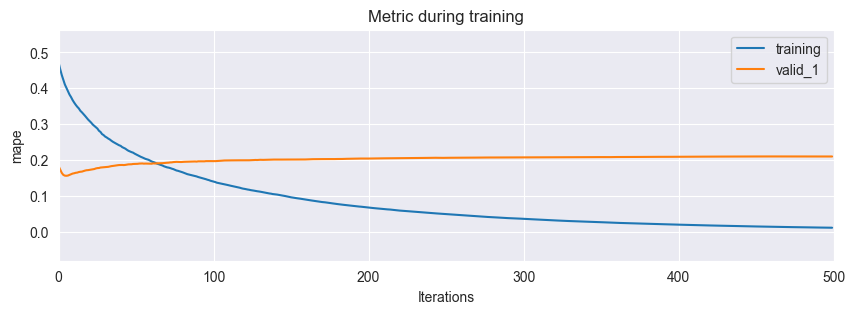

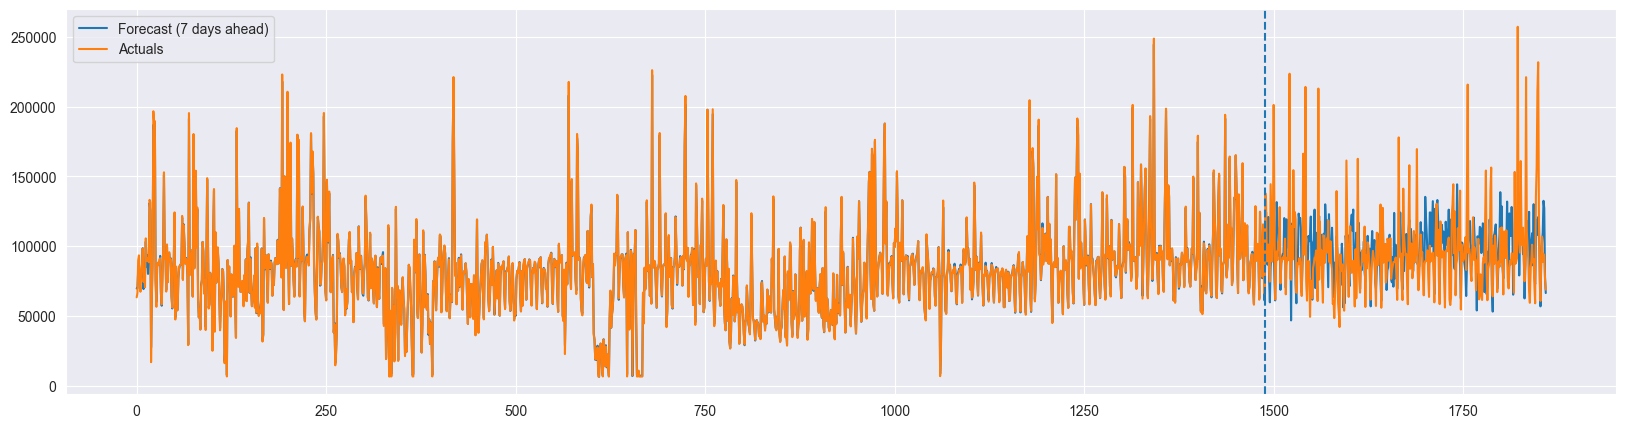

In [104]:
train_ratio = 0.8
x_train, y_train, x_test, y_test = split_train_test(df_feats, train_ratio)
model = fit_lightgbm(x_train, y_train, x_test, y_test, n_estimators=500)    # can use fit_xgboost as an alternative

#
# plot the fitting metrics
#
lightgbm.plot_metric(model, metric='mape', figsize=(10, 3))

#
# plot the forecast
#
forecast = model.predict(pd.concat([x_train, x_test]))

target_col = 'traffic_volume_clipped'

fig, ax = plt.subplots(1, figsize=(20, 5))
ax.plot(df_feats.index, forecast, label='Forecast (7 days ahead)')
ax.plot(df_feats.index, df_feats[target_col], label='Actuals')
ax.axvline(x=df.index[int(len(df_feats) * train_ratio)], linestyle='--')
ax.legend()
plt.show()

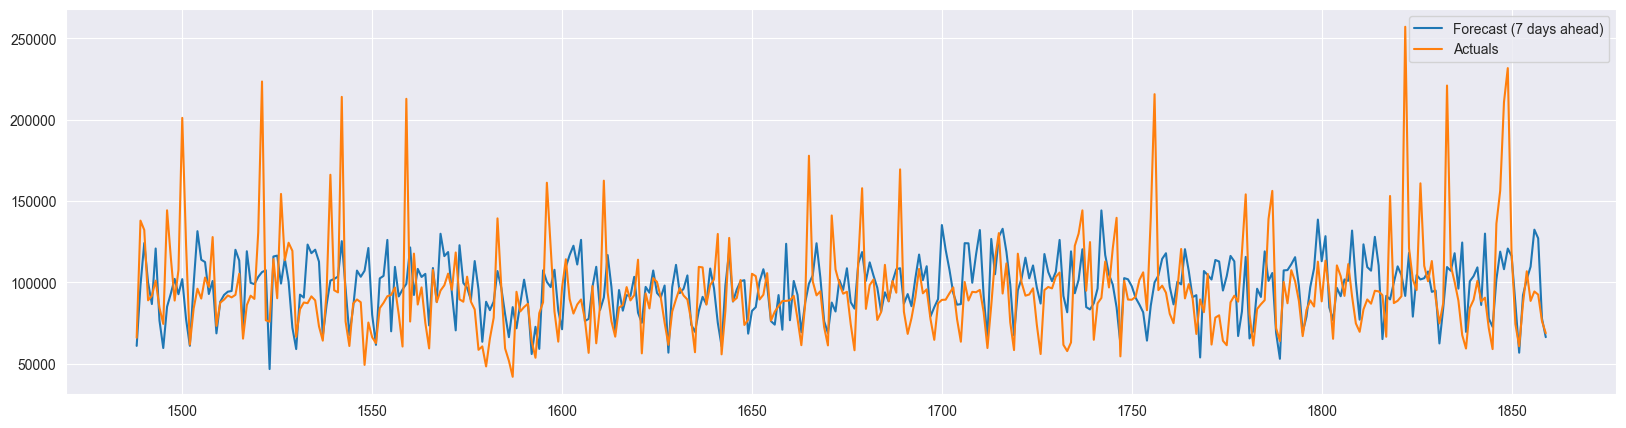

In [105]:
target_col = 'traffic_volume_clipped'

fig, ax = plt.subplots(1, figsize=(20, 5))
ax.plot(df_feats.index[df.index[int(len(df_feats) * train_ratio)]:],
                       forecast[df.index[int(len(df_feats) * train_ratio)]:],
                       label='Forecast (7 days ahead)')
ax.plot(df_feats.index[df.index[int(len(df_feats) * train_ratio)]:],
        df_feats[target_col][df.index[int(len(df_feats) * train_ratio)]:],
        label='Actuals')
ax.legend()
plt.show()

# Online Retail II
https://archive.ics.uci.edu/dataset/502/online+retail+ii

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

In [ ]:
data = pd.read_excel('/content/online_retail_II.xlsx', header=0, engine='openpyxl')

In [ ]:
data.keys()

In [ ]:
data.head()

In [ ]:
data.InvoiceDate = pd.to_datetime(data.InvoiceDate).dt.date

In [ ]:
data.head()

In [ ]:
data['canceled'] = data.Invoice.apply(lambda x: str(x)[0] == 'c')

In [ ]:
data.canceled.sum()

In [ ]:
data.groupby('StockCode').agg({'Description': 'nunique'}).sort_values('Description', ascending=False)[:5]

In [ ]:
data.query("StockCode == 22734")['Description'].unique()

In [ ]:
data.Country.value_counts()

In [ ]:
data_daily = data\
    .query("Country == 'United Kingdom'")\
    .drop(columns=['Country'])\
    .groupby(['InvoiceDate', 'StockCode'])\
    .agg({'Quantity': 'sum',
          'Price': 'mean'})\
    .reset_index()

In [ ]:
data_daily.shape

In [ ]:
data_daily.head()

In [ ]:
data_daily_stats = data_daily\
    .groupby('StockCode')\
    .agg({'InvoiceDate': ['min', 'max', 'nunique'],
          'Quantity': ['min', 'max', 'mean', 'median'],
          'Price': ['min', 'max', 'mean', 'median']})\
    .reset_index()

In [ ]:
data_daily_stats.sort_values(('InvoiceDate', 'nunique'), ascending=False).head()

In [ ]:
(data_daily.InvoiceDate.max() - data_daily.InvoiceDate.min())

In [ ]:
top_items = data_daily_stats\
    .sort_values(('InvoiceDate', 'nunique'), ascending=False)\
    .head()['StockCode'].values

In [ ]:
top_items

In [ ]:
import seaborn as sns


sns.lineplot(data=data_daily.query("StockCode in @top_items"),
                x='InvoiceDate',
                y='Quantity',
                hue='StockCode')

In [ ]:
top_items

In [ ]:
sns.lineplot(data=data_daily.query("StockCode == 21212"),
                x='InvoiceDate',
                y='Quantity')

# ЗП

In [110]:
data_2019 = pd.read_excel('tab2-zpl_01-2024.xlsx',
                     engine='openpyxl',
                     sheet_name=u'с 2019',
                     header=[1, 2])
data_2013 = pd.read_excel('tab2-zpl_01-2024.xlsx',
                     engine='openpyxl',
                     sheet_name=u'2013-2018',
                     header=[2, 3])

In [111]:
data_2013.head()

Unnamed: 0_level_0     2013                                      \
              Unnamed: 0_level_1   январь  февраль     март   апрель      май   
0          Российская Федерация   26840.1  26619.6  28692.9  30025.9  29723.0   
1  Центральный федеральный округ  32118.1  32249.7  35164.6  37138.0  35546.7   
2           Белгородская область  20381.2  19643.7  21027.2  21700.9  21905.5   
3               Брянская область  16773.9  16632.4  17834.5  18263.5  19883.9   
4           Владимирская область  18379.5  18563.0  19203.7  19567.2  19809.7   

                                       ...          2018                \
      июнь     июль   август сентябрь  ...          март        апрель   
0  30986.1  30228.7  29226.3  29345.5  ...  42363.573197  43381.051689   
1  37723.0  37394.0  35277.9  35156.4  ...  53771.108479  56192.142999   
2  22323.0  23128.5  22271.2  21870.4  ...  30092.120040  31477.559109   
3  20178.2  19034.5  19197.6  18717.6  ...  25772.943631  26218.157759   
4  20351.6  20783.7  20593.7  20037.2  ...  29543.866413  29425.484793   

                                                                         \
            май         июнь           июль        август      сентябрь   
0  44075.537537  45848.077648  42413.465177  41363.600671  41774.303366   
1  53566.574932  58177.204035  52984.806847  51383.060017  51529.217602   
2  31179.394927  31947.007286  32422.184653  31603.086760  30909.676470   
3  29552.233919  29209.524124  26891.589526  27094.764072  26484.910603   
4  31177.147074  33806.067775  31565.289709  31510.741043  31431.942284   

                                             
        октябрь        ноябрь       декабрь  
0  42331.668715  42595.005330  55569.330224  
1  52715.114811  52642.495123  71661.794213  
2  31823.450615  31162.800891  37577.386047  
3  26892.199954  27402.825768  32254.503080  
4  31423.128169  31646.622972  38008.974896  

[5 rows x 73 columns]

In [112]:
data_2019.head()

Unnamed: 0_level_0 2019 год                                      \
              Unnamed: 0_level_1   январь  февраль     март   апрель      май   
0           Российская Федерация  42263.2  43062.4  46324.2  48029.8  47926.2   
1  Центральный федеральный округ  52944.5  54939.5  60219.7  63711.2  58602.0   
2           Белгородская область  31858.0  30679.9  32926.5  33617.2  33899.1   
3               Брянская область  26826.3  26752.4  27729.8  29055.9  32207.1   
4           Владимирская область  31220.1  29983.7  30956.6  31668.3  32635.8   

                                       ...   20231)                    \
      июнь     июль   август сентябрь  ...   апрель      май     июнь   
0  49347.9  46509.4  44961.3  45540.9  ...  71203.6  72851.2  76604.2   
1  62400.2  59236.3  56709.4  57136.5  ...  91288.3  88099.7  95179.8   
2  34149.1  35196.3  34048.5  33948.7  ...  50893.5  52706.9  54581.3   
3  31328.1  29353.6  29262.1  29258.0  ...  44696.3  49268.9  50697.2   
4  34235.4  31298.5  31081.2  31292.1  ...  49184.5  51038.0  54101.9   

                                                           20241)  
      июль   август сентябрь  октябрь   ноябрь   декабрь   январь  
0  71419.4  69439.2  70921.5  73829.5  73383.0  103814.9  75033.5  
1  88478.3  85619.2  87731.7  92821.8  90852.6  139515.8  93297.1  
2  55033.6  54391.2  52906.0  56284.7  56081.0   69352.0  60668.0  
3  46835.5  46093.7  46704.9  48866.5  48982.0   62502.6  50348.9  
4  51087.4  51143.1  51387.8  52973.2  53673.1   66780.9  54863.3  

[5 rows x 62 columns]

In [113]:
data_2013_xy = pd.DataFrame(data_2013.iloc[0, :].values[1:], columns=['inc'])
data_2013_xy = data_2013_xy.set_index(pd.date_range(start='2013-01-01', end='2018-12-01', freq='MS'))

data_2019_xy = pd.DataFrame(data_2019.iloc[0, :].values[1:], columns=['inc'])
data_2019_xy = data_2019_xy.set_index(pd.date_range(start='2019-01-01', end='2024-01-01', freq='MS'))

In [114]:
data_all = pd.concat((data_2013_xy, data_2019_xy), axis=0)
data_all.index.name = 'month'
data_all['inc'] = pd.to_numeric(data_all['inc'])

In [115]:
data_all.head()

,inc
month,
2013-01-01,26840.1
2013-02-01,26619.6
2013-03-01,28692.9
2013-04-01,30025.9
2013-05-01,29723.0


In [116]:
data_all.index.min(), data_all.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00'))

<Axes: xlabel='month'>

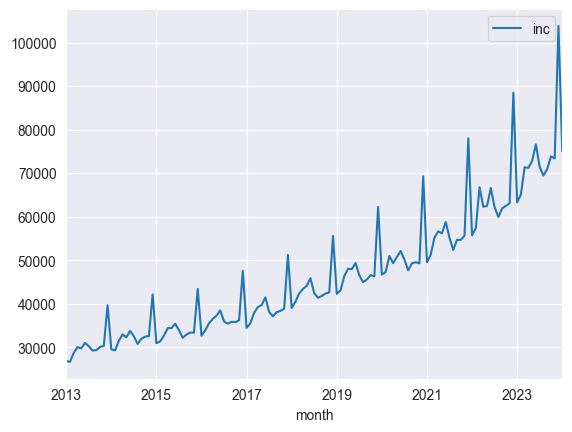

In [117]:
data_all.plot()

## в лоб бустингом

In [118]:
def features_regression(df, target_col, covariates_list=None):

    observed_features = covariates_list
    if observed_features:
        dff = df[[target_col] + observed_features]
    else:
        dff = df[[target_col]]

    dff['year'] = dff.index.year
    dff['month'] = dff.index.month
    dff['day_of_year'] = dff.index.dayofyear

    feature_lags = [1, 2, 3, 6, 9, 12]
    for lag in feature_lags:
        dff.loc[:, f'{target_col}_lag_{lag}'] = dff[target_col].shift(periods=lag, fill_value=0).values

    return dff


#
# train-test split
#
def split_train_test(df, train_ratio, target_col):
    y_train, y_test = [], []
    x_train, x_test = [], []
    split_t = int(len(df)*train_ratio)

    y = df[target_col]
    y_train = y[:split_t]
    y_test = y[split_t:]

    xdf = df.drop(target_col, inplace=False, axis=1)
    x_train = xdf[:split_t]
    x_test = xdf[split_t:]

    return x_train, y_train, x_test, y_test

#
# fit LightGBM model
#
def fit_lightgbm(x_train, y_train, x_test=None, y_test=None, n_estimators=100, verbose_eval=50):

    model = lightgbm.LGBMRegressor(
        boosting_type = 'gbdt',
        #num_leaves = 8 - 1,
        n_estimators=n_estimators,
        verbose=-1
        )
    try:
        model.fit(x_train,
                y_train,
                eval_set=[(x_train, y_train), (x_test, y_test)],
                eval_metric='mape',
                )
    except:
        model.fit(x_train,
                y_train)

    return model

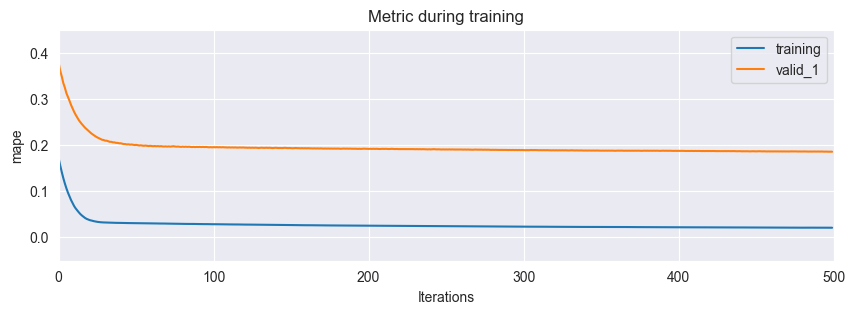

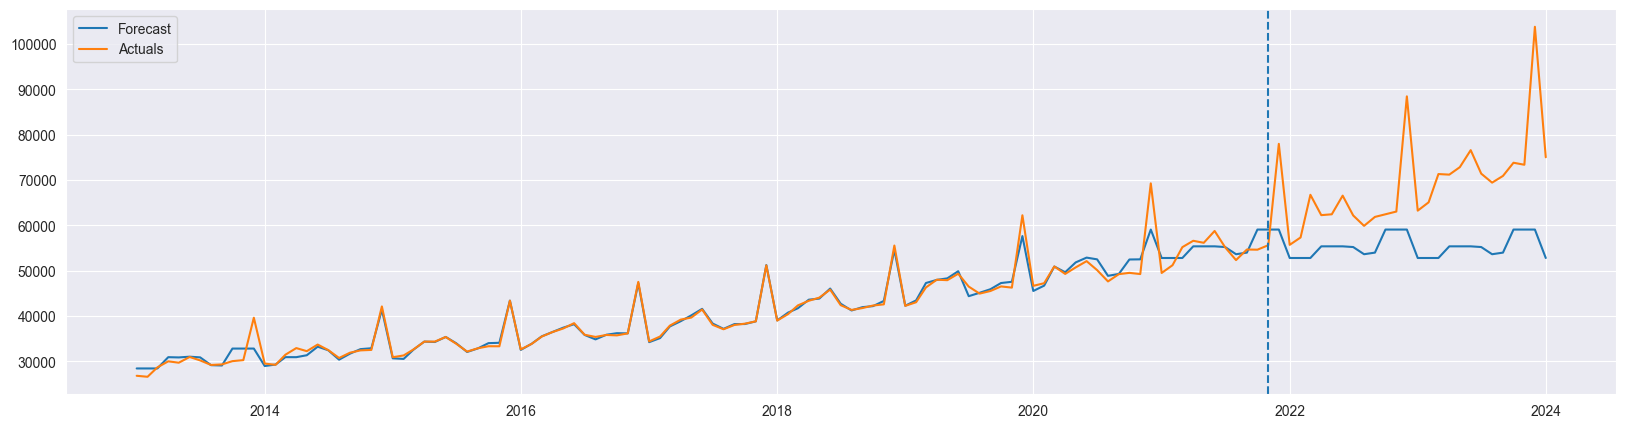

In [119]:
df_gbdt = features_regression(data_all, target_col='inc')
train_ratio = 0.8
x_train, y_train, x_test, y_test = split_train_test(df_gbdt, train_ratio, target_col='inc')
model = fit_lightgbm(x_train, y_train, x_test, y_test, n_estimators=500)    # can use fit_xgboost as an alternative

#
# plot the fitting metrics
#
lightgbm.plot_metric(model, metric='mape', figsize=(10, 3))

#
# plot the forecast
#
forecast = model.predict(pd.concat([x_train, x_test]))

fig, ax = plt.subplots(1, figsize=(20, 5))
ax.plot(df_gbdt.index, forecast, label='Forecast')
ax.plot(df_gbdt.index, df_gbdt['inc'], label='Actuals')
ax.axvline(x=data_all.index[int(len(df_gbdt) * train_ratio)], linestyle='--')
ax.legend()
plt.show()

In [120]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

forecast = model.predict(x_test)
df_forecast = y_test.to_frame()
df_forecast['lgbm_base'] = forecast
print(mean_absolute_error(y_test, forecast))
print(mean_absolute_percentage_error(y_test, forecast))

13602.296043015253
0.18497694837490244


## добавим тренд
на трейне:

    1) обучим лин модель на временных метках.
    2) делим/вычитаем тренд в зависимости от типа сезонности
    3) на остатках обучаем бустинг

на тесте:

    1) делаем прогнозы бустингом
    2) делаем прогнозы тренда
    3) собираем все вместе

In [121]:
from sklearn.linear_model import LinearRegression


def detrending(df, trend_model, target_col='inc', seas_type='mult', dt_col='month'):
    df_trend = df.reset_index()
    X = df_trend.index.values
    y = df_trend[target_col].values
    trend_model.fit(X.reshape(-1, 1), y)
    y_pred = trend_model.predict(X.reshape(-1, 1))
    target_col_detrended = target_col + '_detrended'
    if seas_type not in ['add', 'mult']:
        raise ValueError('seas_type should be mult or add')
    elif seas_type == 'mult':
        df_trend[target_col_detrended] = df_trend[target_col] / y_pred
    else:
        df_trend[target_col_detrended] = df_trend[target_col] - y_pred
    df_trend = df_trend.set_index(dt_col)[[target_col_detrended]]
    df_trend['trend'] = y_pred
    return df_trend, trend_model, y_pred


def predict_trend(y_train, df_test, trend_model, target_col='inc'):
    try:
        last_val = y_train.iloc[-1].values[0]
    except:
        last_val = y_train.iloc[-1]
    trend_predicts = []
    for _ in range(df_test.shape[0]):
        val = last_val + trend_model.coef_[0]
        last_val = val
        trend_predicts.append(val)
    df_test['trend'] = trend_predicts
    return df_test


def restore_trend(y_pred_detr, df_test, seas_type='mult', col='trend'):
    if seas_type not in ['add', 'mult']:
        raise ValueError('seas_type should be mult or add')
    elif seas_type == 'mult':
        y_pred = y_pred_detr * df_test[col].values
    else:
        y_pred = y_pred_detr + df_test[col].values
    return y_pred

In [122]:
# сохраним фичи
feats_cols = x_train.columns
feats_cols

Index(['year', 'month', 'day_of_year', 'inc_lag_1', 'inc_lag_2', 'inc_lag_3',
       'inc_lag_6', 'inc_lag_9', 'inc_lag_12'],
      dtype='object')

In [123]:
# учимся тренду, убираем его и делаем прогноз
y_train_detrended, trend_lr, trend_ex = detrending(y_train, LinearRegression())
y_test_trend = predict_trend(y_train, x_test, trend_lr)

<Axes: xlabel='month'>

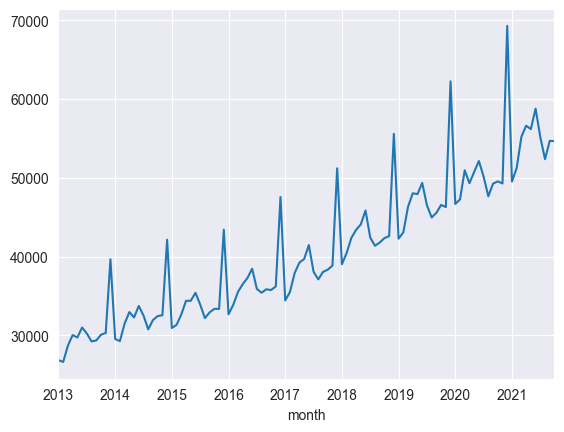

In [124]:
y_train.plot()

<Axes: xlabel='month'>

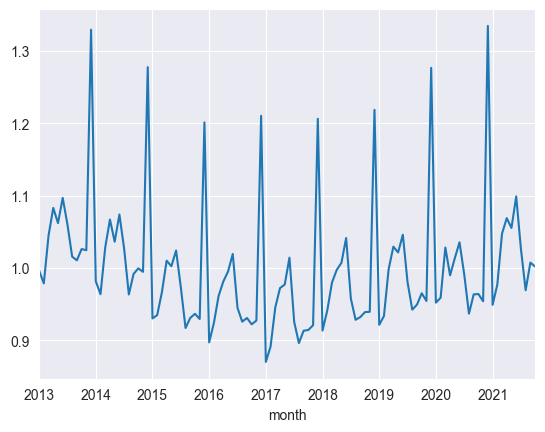

In [125]:
y_train_detrended['inc_detrended'].plot()

<Axes: xlabel='month'>

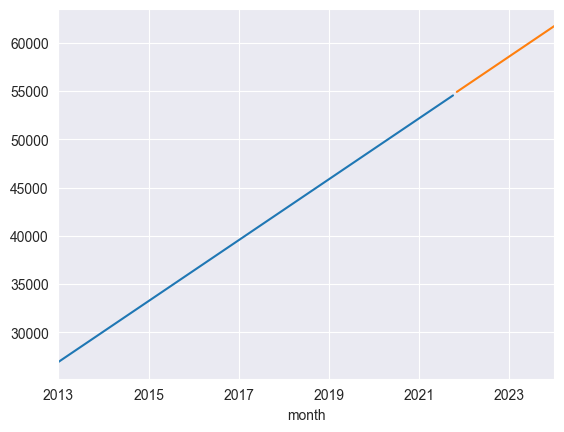

In [126]:
y_train_detrended['trend'].plot()
y_test_trend.trend.plot()

In [ ]:
# обучаем бустинг без тренда
model = fit_lightgbm(x_train[feats_cols],
                     y_train_detrended['inc_detrended']);

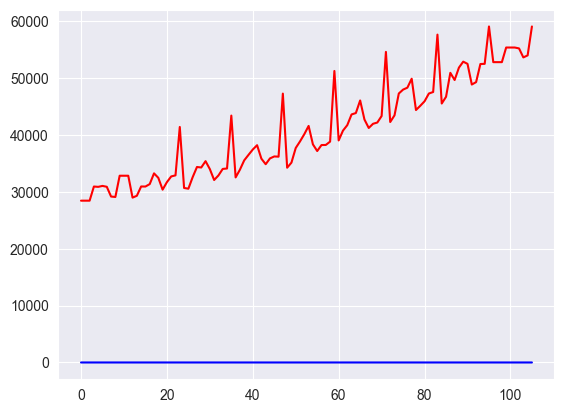

In [127]:
# убедимся, что обучились без тренда
plt.plot(y_train_detrended['inc_detrended'].values, color='blue')
plt.plot(model.predict(x_train[feats_cols]), color='red')

In [128]:
# вернем тренд
y_pred_detr = model.predict(x_test[feats_cols])
y_pred = restore_trend(y_pred_detr, y_test_trend)
df_forecast['lgbm_trend'] = y_pred

In [129]:
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

3242027036.1253104
47669.12033500535


<Axes: xlabel='month'>

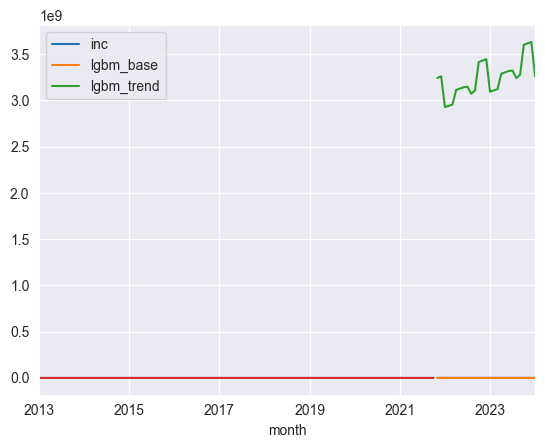

In [130]:
df_forecast.plot()
y_train.plot()

## сезонность

на трейне:

    1) обучим лин модель на временных метках.
    2) делим/вычитаем тренд в зависимости от типа сезонности
    3) для каждого периода вычисляем среднее значение и среднее средних
    4) в зависимости от типа сезонности делим/вычитаем из средних периодов среднее средних => получили коэффициенты сезонности
    5) исходные значения ряда делим/вычитаем на коэф сезонности
    6) на ряде без сезонности обучаем лин модель и вычитаем/делим => ряд без сезонности и тренда
    7) обучаем бустинг

на тесте:

    1) делаем прогнозы бустингом
    2) делаем прогнозы тренда
    3) делаем прогнозы сезонности
    3) собираем все вместе

In [ ]:
def get_seasonal(df, seas_type='mult', target_col='inc'):
    lr = LinearRegression()
    dt_col = df.index.name
    df_trend = df.reset_index()
    X = df_trend.index.values
    y = df_trend[target_col].values
    lr.fit(X.reshape(-1, 1), y)
    y_pred = lr.predict(X.reshape(-1, 1))
    if seas_type not in ['add', 'mult']:
        raise ValueError('seas_type should be mult or add')
    elif seas_type == 'mult':
        df_trend['detrended'] = df_trend[target_col] / y_pred
    else:
        df_trend['detrended'] = df_trend[target_col] - y_pred
    df_trend['period'] = df_trend[dt_col].dt.month
    df_agg = df_trend\
        .groupby('period')\
        .agg({'detrended': 'mean'})\
        .reset_index()
    mean_mean = df_agg['detrended'].mean()
    if seas_type not in ['add', 'mult']:
        raise ValueError('seas_type should be mult or add')
    elif seas_type == 'mult':
        df_agg['seasonal'] = df_agg['detrended'] / mean_mean
    else:
        df_agg['seasonal'] = df_agg['detrended'] - mean_mean
    df_trend = df_trend.merge(df_agg[['period', 'seasonal']], on='period', how='inner')
    return df_trend.set_index(dt_col)['seasonal'], df_agg


def deseason(df, df_seasonal, seas_type='mult', target_col='inc'):
    df_deseas = pd.concat((df, df_seasonal), axis=1)
    if seas_type not in ['add', 'mult']:
        raise ValueError('seas_type should be mult or add')
    elif seas_type == 'mult':
        df_deseas['deseason'] = df_deseas[target_col] / df_deseas['seasonal']
    else:
        df_deseas['detrended'] = df_deseas[target_col] - df_deseas['seasonal']
    return df_deseas

In [ ]:
df_seas, df_agg = get_seasonal(y_train, seas_type='mult')

In [ ]:
df_agg

In [ ]:
df_deseas = deseason(y_train, df_seas)

In [ ]:
df_deseas['inc'].plot(kind='line', figsize=(8, 4), title='inc')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_deseas['seasonal'].plot(kind='line', figsize=(8, 4), title='inc')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_deseas['deseason'].plot(kind='line', figsize=(8, 4), title='inc')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_deseas_detr, lr_trend, trend_ex  = detrending(df_deseas,
                                                 LinearRegression(),
                                                 target_col='deseason',
                                                 seas_type='mult')
y_test_trend = predict_trend(df_deseas_detr['trend'], x_test, lr_trend, target_col='deseason')

In [ ]:
df_deseas_detr

In [ ]:
df_deseas_detr['trend'].plot()
y_test_trend.trend.plot()

In [ ]:
df_deseas_detr.deseason_detrended.plot()

In [ ]:
model = fit_lightgbm(x_train[feats_cols],
                     df_deseas_detr['deseason_detrended']);

In [ ]:
plt.plot(df_deseas_detr.deseason_detrended.values)
plt.plot(model.predict(x_train[feats_cols]))

In [ ]:
# вернем тренд
x_test = x_test.sort_index()
# y_pred_deseas_detr = model.predict(x_test[feats_cols])
x_test['pred_lgbm'] = model.predict(x_test[feats_cols])
x_test = x_test.merge(y_test_trend['trend'], how='inner')
x_test['pred'] = x_test['pred_lgbm'] + x_test['trend']
# y_pred = restore_trend(y_pred_deseas_detr, y_test_trend, seas_type='add')
# вернем сезонность
# x_test['pred'] = y_pred
# x_test_upd = x_test.assign(period=x_test.index.month)\
#                         .merge(df_agg[['period', 'seasonal']],
#                                on='period',
#                                how='inner')
# x_test_upd['pred'] = x_test_upd['pred'] * x_test_upd['seasonal']
x_test = x_test.merge(df_agg[['period', 'seasonal']],
                               left_on='month',
                                right_on='period',
                               how='inner')
x_test['pred'] = x_test['seasonal'] * x_test['pred']
y_pred = x_test['pred'].values
# # y_pred = restore_trend(y_pred,
# #                        y_test_trend\
# #                         .assign(period=y_test_trend.index.month)\
# #                         .merge(df_agg[['period', 'seasonal']],
# #                                on='period',
# #                                how='inner'),
# #                        seas_type='mult', col='seasonal')
df_forecast['lgbm_des_trend'] = y_pred
# print(mean_absolute_error(y_test, y_pred))
# print(mean_absolute_percentage_error(y_test, y_pred))

In [ ]:
df_forecast.plot()
y_train.plot()

## все ли делаем правильно?

### trend

In [ ]:

x_test.index.min()

In [ ]:
test_start = x_test.index.min()
data_train = data_all[data_all.index < test_start].copy()
data_test = data_all[data_all.index >= test_start].copy()

In [ ]:
# учимся тренду, убираем его и делаем прогноз
y_train_detrended, trend_lr, trend_ex = detrending(data_train, LinearRegression())
y_test_trend = predict_trend(data_train, data_test, trend_lr)

In [ ]:
y_train_detrended['inc_detrended'].plot()

In [ ]:
y_train_detrended['trend'].plot()
y_test_trend.trend.plot()

In [ ]:
def splitXy(df, col_y):
    return df.drop(columns=[col_y]), df[col_y]

In [ ]:
# обучаем бустинг без тренда
# вот теперь считаем фичи

df_gbdt_train = features_regression(y_train_detrended, target_col='inc_detrended')
x_train, y_train = splitXy(df_gbdt_train, 'inc_detrended')
df_gbdt_test = features_regression(pd.concat((y_train_detrended,
                                              data_test\
                                              .assign(inc_detrended=data_test.inc / data_test.trend)),
                                              axis=0),
                                   target_col='inc_detrended')
df_gbdt_test = df_gbdt_test[df_gbdt_test.index >= test_start]
x_test, y_test = splitXy(df_gbdt_test, 'inc_detrended')

model = fit_lightgbm(x_train,
                     y_train);

In [ ]:
plt.plot(y_train.values)
plt.plot(model.predict(x_train))

In [ ]:
# вернем тренд
y_pred_detr = model.predict(x_test)
y_pred = restore_trend(y_pred_detr, y_test_trend)
df_forecast['lgbm_trend'] = y_pred

print(mean_absolute_error(data_test.inc.values, y_pred))
print(mean_absolute_percentage_error(data_test.inc.values, y_pred))

In [ ]:
df_forecast.plot()
data_train.inc.plot()